In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Имеется статистика по расходам на покупки покупателей некоего товара-услуги массовогоо потребелния, который покупают все категории граждан (чем больше человек тратит, тем выше его доход). Также имеются данные об их доходе (считам, что мы просто имеем эту цифру в данных). В дата сете имеется информацию о количесте приобетенного товара, его цене, возраст покупеталя.

In [19]:
n = 10000
age = np.random.choice(60, n) + 20
goodsprice = np.random.choice(1000, n) + 200
qty = np.random.choice(29, n) + 1

salary = goodsprice*qty*10 + np.random.normal()*1000

data = pd.DataFrame({'age': age, 'goodsprice': goodsprice, 'qty': qty, 'salary': salary})
data.head(5)

,age,goodsprice,qty,salary
0,51,1135,9,101591.610016
1,60,501,5,24491.610016
2,73,360,27,96641.610016
3,72,1079,20,215241.610016
4,31,377,24,89921.610016


Если посмотреть на зависиости признаков и целевой переменной, то они отличаются не только по характеру распределния, но и не совсем могут быть отнесены к линейной зависимости. при кувлиечении значний пирзнака ошибка будет значительно расти. 

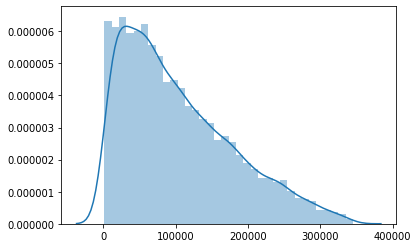

In [20]:
sns.distplot(data[['salary']])

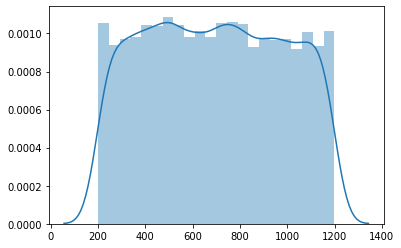

In [21]:
sns.distplot(data[['goodsprice']])

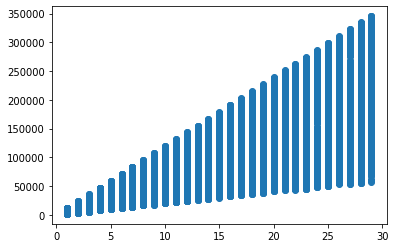

In [22]:
fig, ax = plt.subplots()
ax.scatter(data[['qty']], data[['salary']])

In [23]:
data['salary'].median()

85801.61001583959

Построим модель на основе всех признаков. В результате видим, что показатель качества модели МАЕ достаточно большой (плохой). То есть, при медианном значнии (берем медиану так как у нас гауссовское расределение salary) отклонение может быть порядка 20%. из графика видно, что с увеличением количества ошибка будет больше.

In [24]:
X = data[['age', 'qty', 'goodsprice']]
y = data['salary']
model_all = LinearRegression()
model_all.fit(X, y)
print(f'Coef: {model_all.coef_}')
print(f'Intercept: {model_all.intercept_}')

prediction = model_all.predict(X)
print(f'MAE: {mean_absolute_error(prediction, y)}')

Coef: [  19.84111055 6940.53804495  150.74325018]
Intercept: -106139.59679819935
MAE: 17888.393088719047


Построим модель на основе одного признака. В результате видим, что показатель качества модели МАЕ стал еще хуже. Из графика видно, что с увеличением количества ошибка будет больше.

In [25]:
X = data[['qty']]
y = data['salary']
model_one = LinearRegression()
model_one.fit(X, y)
print(f'Coef: {model_one.coef_}')
print(f'Intercept: {model_one.intercept_}')

prediction = model_one.predict(X)
print(f'MAE: {mean_absolute_error(prediction, y)}')

Coef: [6945.53351938]
Intercept: -478.0984689855686
MAE: 37218.2583703595


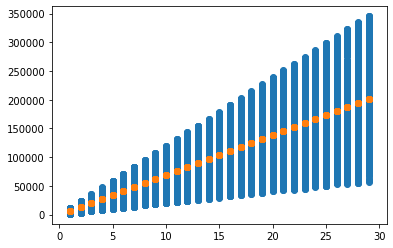

In [26]:
fig, ax = plt.subplots()
yyy = data[['qty']] * model_one.coef_ + model_one.intercept_
ax.scatter(data[['qty']], data[['salary']])
ax.scatter(data[['qty']], yyy)

чтобы переменные были линейно зависим, их распределения значений должны быть похожи или одного типа. если перемножить qty и goodsprice, то новый признак будет схож с рампределением salary.

In [27]:
data['formula'] = data['qty'] * data['goodsprice']
data

,age,goodsprice,qty,salary,formula
0,51,1135,9,101591.610016,10215
1,60,501,5,24491.610016,2505
2,73,360,27,96641.610016,9720
3,72,1079,20,215241.610016,21580
4,31,377,24,89921.610016,9048
...,...,...,...,...,...
9995,30,1149,12,137321.610016,13788
9996,53,974,7,67621.610016,6818
9997,61,465,25,115691.610016,11625
9998,69,808,16,128721.610016,12928


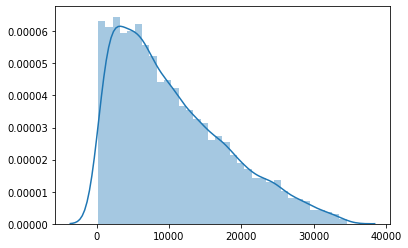

In [28]:
sns.distplot(data[['formula']])

Если возьмем теперь построим модель на основе нового признака и таргета, то ошика МАЕ будет близка к 0, что говорит о хорошей прогнозируемости модели и линейной зависимости.

In [29]:
Xfin = data[['formula']]
y = data['salary']
model_fin = LinearRegression()
model_fin.fit(Xfin, y)
print(f'Coef: {model_fin.coef_}')
print(f'Intercept: {model_fin.intercept_}')

prediction_fin = model_fin.predict(Xfin)
print(f'MAE: {mean_absolute_error(prediction_fin, y)}')

Coef: [10.]
Intercept: -558.3899841603561
MAE: 3.716795617947355e-11


In [30]:
data[['formula', 'salary']].corr()

,formula,salary
formula,1.0,1.0
salary,1.0,1.0


In [31]:
data.corr()

,age,goodsprice,qty,salary,formula
age,1.000000,-0.002523,0.011853,0.012105,0.012105
goodsprice,-0.002523,1.000000,0.000879,0.565177,0.565177
qty,0.011853,0.000879,1.000000,0.764040,0.764040
salary,0.012105,0.565177,0.764040,1.000000,1.000000
formula,0.012105,0.565177,0.764040,1.000000,1.000000


Если в модель добавить дополнительно все признаки, то видим, что качество улучшилось (МАЕ снизилось), хотя насколько я понимаю, дополнительное количество признаков должно требовать большее количество данных в датасете для того же уровня качества предсказаний. Если обратить внимание на коэффициенты признаков, то можно заметить, что они близки к нулю, что говорит об их низком влиянии на предсказательную способность модели.

In [32]:

Xfin = data[['age', 'qty', 'goodsprice', 'formula']]
y = data['salary']
model_fin = LinearRegression()
model_fin.fit(Xfin, y)
print(f'Coef: {model_fin.coef_}')
print(f'Intercept: {model_fin.intercept_}')

prediction_fin = model_fin.predict(Xfin)
print(f'MAE: {mean_absolute_error(prediction_fin, y)}')

Coef: [8.99621245e-14 6.90242660e-12 2.99074310e-14 1.00000000e+01]
Intercept: -558.3899841604725
MAE: 2.809927082125796e-11
